In [1]:
import pandas as pd

1. 주제선정
2. 데이터 수집
3. 데이터 전처리 / 정제
   - 데이터 가공
4. 기술통계 (EDA)
   - 사분위수, 그래프 등
5. 추론통계 (통계학, ml)

- 피벗 테이블
  - 데이터를 요약하여 보여주는 방법

- 데이터 : 2005, 2010, 2015년에 서울, 부산, 인천의 인구 데이터

In [2]:
origin = pd.read_excel("city_people.xlsx")
origin

,도시,연도,인구,지역
0,서울,2015,9904312,수도권
1,서울,2010,9631482,수도권
2,서울,2005,9762546,수도권
3,부산,2015,3448737,경상권
4,부산,2010,3393191,경상권
5,부산,2005,3512547,경상권
6,인천,2015,2890451,수도권
7,인천,2010,2632035,수도권


- pandas 패키지의 pivot_table() : 엑셀의 그것과 동일
  - index : 피벗 테이블의 행
  - columns : 피벗 테이블의 열
  - values : 집계할 데이터

In [3]:
pivot1 = pd.pivot_table(origin,
                        index = '도시',
                        columns = '연도',
                        values = '인구')

print(type(pivot1))
pivot1

<class 'pandas.core.frame.DataFrame'>


연도,2005,2010,2015
도시,,,
부산,3512547.0,3393191.0,3448737.0
서울,9762546.0,9631482.0,9904312.0
인천,NaN,2632035.0,2890451.0


- 인덱스와 컬럼에 따른 value가 2개 이상인 경우 집계방법을 지정해야 정확한 결과를 얻을 수 있음
  - 합계? 평균?
- 예시 데이터는 동년 수도권에 대한 데이터가 두 개씩 존재 (서울, 인천)
  - 전체 인구수를 얻어야 하는 경우라면 합계를 구해야 함
  - aggfunc 패러미터를 sum으로 지정하면 합계를 구함
    - 디폴트는 mean(평균)

In [4]:
pd.pivot_table(origin,
                index = '지역',
                columns = '연도',
                values = '인구',
                aggfunc = 'sum')

연도,2005,2010,2015
지역,,,
경상권,3512547,3393191,3448737
수도권,9762546,12263517,12794763


- 복수의 집계데이터가 필요한 경우 방법을 리스트로 나열

In [5]:
pd.pivot_table(origin,
                index = '지역',
                columns = '연도',
                values = '인구',
                aggfunc = ['sum', 'mean'])

sum                           mean                      
연도      2005      2010      2015       2005       2010       2015
지역                                                               
경상권  3512547   3393191   3448737  3512547.0  3393191.0  3448737.0
수도권  9762546  12263517  12794763  9762546.0  6131758.5  6397381.5

- 복수의 인덱스 설정

In [6]:
pd.pivot_table(origin,
                index = ['지역', '연도'],
                columns = '도시',
                values = '인구',
                aggfunc = ['sum', 'mean'])

sum                             mean                      
도시               부산         서울         인천         부산         서울         인천
지역  연도                                                                    
경상권 2005  3512547.0        NaN        NaN  3512547.0        NaN        NaN
    2010  3393191.0        NaN        NaN  3393191.0        NaN        NaN
    2015  3448737.0        NaN        NaN  3448737.0        NaN        NaN
수도권 2005        NaN  9762546.0        NaN        NaN  9762546.0        NaN
    2010        NaN  9631482.0  2632035.0        NaN  9631482.0  2632035.0
    2015        NaN  9904312.0  2890451.0        NaN  9904312.0  2890451.0

- pd.melt : 피벗테이블로 요약한 데이터를 다시 원 데이터의 형태로 재구조화

In [7]:
pivot_df = pd.pivot_table(origin, index = '연도', columns = '지역', values = '인구', aggfunc = 'mean')
pivot_df

지역,경상권,수도권
연도,,
2005,3512547.0,9762546.0
2010,3393191.0,6131758.5
2015,3448737.0,6397381.5


In [8]:
pivot_df2 = pivot_df.reset_index()
pivot_df2

지역,연도,경상권,수도권
0,2005,3512547.0,9762546.0
1,2010,3393191.0,6131758.5
2,2015,3448737.0,6397381.5


- melt의 파라미터
  - id_vars : 인덱스로 사용할 컬럼의 이름 (기본 참조)
  - value_vars : 데이터를 나눌 컬럼의 이름들

In [9]:
mdf = pd.melt(pivot_df2, id_vars = ['연도'], value_vars = ['경상권', '수도권'])
mdf

,연도,지역,value
0,2005,경상권,3512547.0
1,2010,경상권,3393191.0
2,2015,경상권,3448737.0
3,2005,수도권,9762546.0
4,2010,수도권,6131758.5
5,2015,수도권,6397381.5


- var_name과 value_name 파라미터를 직접 지정하여 컬럼의 이름을 직접 지정

In [10]:
mdf = pd.melt(pivot_df2, id_vars = ['연도'], value_vars = ['경상권', '수도권'],
              var_name = '구분', value_name = '인구수')
mdf

,연도,구분,인구수
0,2005,경상권,3512547.0
1,2010,경상권,3393191.0
2,2015,경상권,3448737.0
3,2005,수도권,9762546.0
4,2010,수도권,6131758.5
5,2015,수도권,6397381.5


- stack, unstack
  - stack : 인덱스 열에 따라 모든 변수를 하나의 변수로 쌓는 처리
  - 원본 데이터프레임의 컬럼명이 시리즈의 변수로, 본래 데이터가 해당 변수에 엮여서 출력됨
    - return 결과는 시리즈

In [11]:
origin = pd.read_excel('body_size.xlsx', index_col = 'name')
origin

,sex,height,weight
name,,,
Lee,M,175,98.0
Park,F,167,48.0
Hong,M,180,NaN
Kim,F,162,55.0
Nam,M,172,85.0


In [12]:
st1 = origin.stack()
st1

name        
Lee   sex          M
      height     175
      weight    98.0
Park  sex          F
      height     167
      weight    48.0
Hong  sex          M
      height     180
Kim   sex          F
      height     162
      weight    55.0
Nam   sex          M
      height     172
      weight    85.0
dtype: object

- 기본적으로 결측치를 무시하지만 dropna를 False로 설정하면 결측치도 stack 결과에 NaN값으로 포함시킴

In [13]:
st2 = origin.stack(dropna = False)
st2

name        
Lee   sex          M
      height     175
      weight    98.0
Park  sex          F
      height     167
      weight    48.0
Hong  sex          M
      height     180
      weight     NaN
Kim   sex          F
      height     162
      weight    55.0
Nam   sex          M
      height     172
      weight    85.0
dtype: object

- unstack : stack 결과를 원래대로 되돌림

In [14]:
st2.unstack()

,sex,height,weight
name,,,
Lee,M,175,98.0
Park,F,167,48.0
Hong,M,180,NaN
Kim,F,162,55.0
Nam,M,172,85.0


- groupby()

In [15]:
origin = pd.read_excel('traffic_acc.xlsx')
origin.head()

,년도,월,발생건수,사망자수,부상자수
0,2005,1,15494,504,25413
1,2005,2,13244,431,21635
2,2005,3,16580,477,25550
3,2005,4,17817,507,28131
4,2005,5,19085,571,29808


- groupby()의 집계함수
  - count, sum, mean, median, var 등...

In [16]:
origin.groupby('년도').sum().head()

,월,발생건수,사망자수,부상자수
년도,,,,
2005,78,214171,6376,342233
2006,78,213745,6327,340229
2007,78,211662,6166,335906
2008,78,215822,5870,338962
2009,78,231990,5838,361875


- 불필요한 컬럼의 제거

In [17]:
df = origin.drop('월', axis = 1)
df.head()

,년도,발생건수,사망자수,부상자수
0,2005,15494,504,25413
1,2005,13244,431,21635
2,2005,16580,477,25550
3,2005,17817,507,28131
4,2005,19085,571,29808


In [18]:
df.groupby('년도').sum().head()

,발생건수,사망자수,부상자수
년도,,,
2005,214171,6376,342233
2006,213745,6327,340229
2007,211662,6166,335906
2008,215822,5870,338962
2009,231990,5838,361875


- 확인할 컬럼의 수가 적으면 filter 메서드가 편리함

In [19]:
df2 = df.filter(['년도', '사망자수'])
df2.head()

,년도,사망자수
0,2005,504
1,2005,431
2,2005,477
3,2005,507
4,2005,571


- 기준이 2개 이상

In [20]:
origin.groupby(['년도', '월']).mean().head()

발생건수   사망자수     부상자수
년도   월                         
2005 1  15494.0  504.0  25413.0
     2  13244.0  431.0  21635.0
     3  16580.0  477.0  25550.0
     4  17817.0  507.0  28131.0
     5  19085.0  571.0  29808.0

- 두개 이상의 집계함수 : agg에 집계함수들을 리스트로 전달

In [21]:
origin.groupby(['년도', '발생건수']).agg(['sum', 'max', 'min']).head().drop('월', axis = 1)

사망자수             부상자수              
            sum  max  min    sum    max    min
년도   발생건수                                     
2005 13244  431  431  431  21635  21635  21635
     15494  504  504  504  25413  25413  25413
     16580  477  477  477  25550  25550  25550
     17817  507  507  507  28131  28131  28131
     18092  476  476  476  28594  28594  28594

- 함수를 agg에 적용 가능

In [22]:
def myFunction(x):
    return x.max() - x.min()

In [23]:
origin.drop('월', axis = 1).groupby('년도').agg(['max', 'min', myFunction]).head()

발생건수                   사망자수                   부상자수                  
        max    min myFunction  max  min myFunction    max    min myFunction
년도                                                                         
2005  19757  13244       6513  639  431        208  31603  21635       9968
2006  19877  14270       5607  701  373        328  31270  22903       8367
2007  19264  14696       4568  582  446        136  30532  23717       6815
2008  19926  14176       5750  574  423        151  30935  23282       7653
2009  21440  15502       5938  592  405        187  33255  24429       8826

- 람다식 적용

In [24]:
origin.drop('월', axis = 1).groupby('년도').agg(['max', 'min', lambda x : x.max() - x.min()]).head()

발생건수                   사망자수                   부상자수                  
        max    min <lambda_0>  max  min <lambda_0>    max    min <lambda_0>
년도                                                                         
2005  19757  13244       6513  639  431        208  31603  21635       9968
2006  19877  14270       5607  701  373        328  31270  22903       8367
2007  19264  14696       4568  582  446        136  30532  23717       6815
2008  19926  14176       5750  574  423        151  30935  23282       7653
2009  21440  15502       5938  592  405        187  33255  24429       8826

- 집계기준을 인덱스가 아닌 별도 열로 추출할 경우 as_index를 False로 지정

In [25]:
origin.drop('월', axis = 1).groupby('년도', as_index = False).sum().head()

,년도,발생건수,사망자수,부상자수
0,2005,214171,6376,342233
1,2006,213745,6327,340229
2,2007,211662,6166,335906
3,2008,215822,5870,338962
4,2009,231990,5838,361875


In [26]:
origin

,년도,월,발생건수,사망자수,부상자수
0,2005,1,15494,504,25413
1,2005,2,13244,431,21635
2,2005,3,16580,477,25550
3,2005,4,17817,507,28131
4,2005,5,19085,571,29808
...,...,...,...,...,...
163,2018,8,18335,357,27749
164,2018,9,18371,348,27751
165,2018,10,19738,373,28836
166,2018,11,19029,298,28000


In [27]:
import matplotlib.pyplot as plt

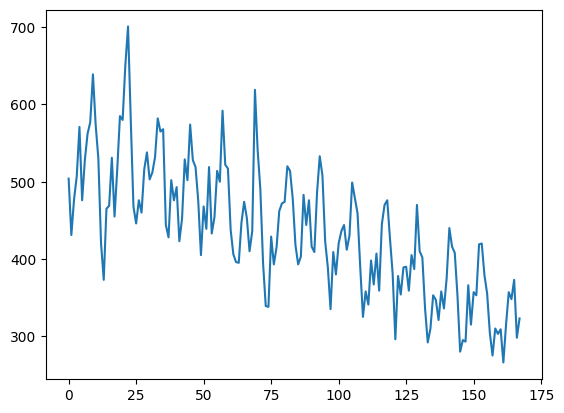

In [28]:
plt.plot(origin['사망자수'])
plt.show()

In [29]:
origin.drop('월', axis = 1).groupby('년도').agg({'발생건수' : ['sum', 'max'], '사망자수' : 'sum', '부상자수' : 'sum'}).head()

발생건수         사망자수    부상자수
         sum    max   sum     sum
년도                               
2005  214171  19757  6376  342233
2006  213745  19877  6327  340229
2007  211662  19264  6166  335906
2008  215822  19926  5870  338962
2009  231990  21440  5838  361875

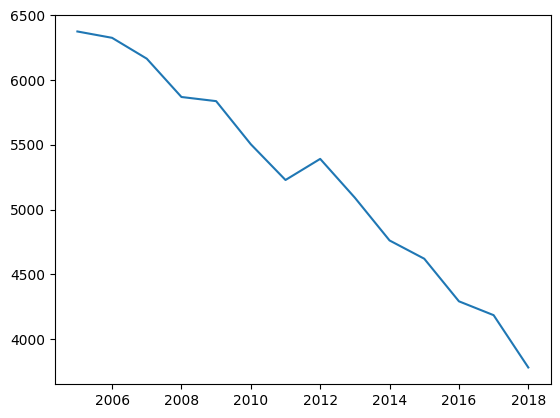

In [30]:
plt.plot(origin.drop('월', axis = 1).groupby('년도').sum()['사망자수'])
plt.show()

- 명목형 변수의 처리
  - 수치형 데이터가 아닌 것을 의미하는 것으로 데이터형이 꼭 'category' 일 필요는 없음

In [31]:
origin = pd.read_excel('score.xlsx')
origin

,gender,score
0,M,A
1,M,C
2,M,B
3,M,B
4,W,A
5,W,C
6,W,C
7,W,B


In [32]:
origin.value_counts()

gender  score
M       B        2
W       C        2
M       A        1
        C        1
W       A        1
        B        1
dtype: int64

In [33]:
origin['gender'].value_counts()

M    4
W    4
Name: gender, dtype: int64

In [34]:
origin['score'].value_counts()

C    3
B    3
A    2
Name: score, dtype: int64

- 교차표(crosstab)

In [35]:
pd.crosstab(index = origin['gender'], columns = origin['score'])

score,A,B,C
gender,,,
M,1,2,1
W,1,1,2


- 추가 파라미터
  - rownames : 인덱스 이름
  - colnames : 컬럼 이름
  - magins : 집계 총합 포함 여부 (All)

In [36]:
pd.crosstab(index = origin['gender'], columns = origin['score'],
            rownames = ['성별'], colnames = ['점수'], margins = True)

점수,A,B,C,All
성별,,,,
M,1,2,1,4
W,1,1,2,4
All,2,3,3,8


- normalize 파라미터를 True로 표현하면 비율로 표기함

In [37]:
pd.crosstab(index = origin['gender'], columns = origin['score'],
            rownames = ['성별'], colnames = ['점수'], margins = True, normalize = True)

점수,A,B,C,All
성별,,,,
M,0.125,0.250,0.125,0.5
W,0.125,0.125,0.250,0.5
All,0.250,0.375,0.375,1.0


- 데이터 정규화

In [38]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [39]:
origin = pd.read_excel("gradeuate.xlsx")
origin

,합격여부,필기점수,학부성적,병원경력
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4
...,...,...,...,...
395,0,620,4.00,2
396,0,560,3.04,3
397,0,460,2.63,2
398,0,700,3.65,2


- MinMaxScaler
  - 0 ~ 1 범위로 조정
  - X - X(min) / X(max) - X(min)

- 직접 변환

In [40]:
df = origin.copy()

xmin = df['필기점수'].min()
xmax = df['필기점수'].max()

df['필기점수_MinMax(1)'] = (df['필기점수'] - xmin) / (xmax - xmin)
df

,합격여부,필기점수,학부성적,병원경력,필기점수_MinMax(1)
0,0,380,3.61,3,0.275862
1,1,660,3.67,3,0.758621
2,1,800,4.00,1,1.000000
3,1,640,3.19,4,0.724138
4,0,520,2.93,4,0.517241
...,...,...,...,...,...
395,0,620,4.00,2,0.689655
396,0,560,3.04,3,0.586207
397,0,460,2.63,2,0.413793
398,0,700,3.65,2,0.827586


- 배열 대입

In [41]:
n = df['필기점수'].values
n[:5]

array([380, 660, 800, 640, 520], dtype=int64)

In [42]:
n_re = n.reshape(-1, 1)
n_re[:5]

array([[380],
       [660],
       [800],
       [640],
       [520]], dtype=int64)

In [43]:
scaler = MinMaxScaler()
scaler.fit(n_re)

df['필기점수_MinMax(2)'] = scaler.transform(n_re)

In [44]:
df.head()

,합격여부,필기점수,학부성적,병원경력,필기점수_MinMax(1),필기점수_MinMax(2)
0,0,380,3.61,3,0.275862,0.275862
1,1,660,3.67,3,0.758621,0.758621
2,1,800,4.00,1,1.000000,1.000000
3,1,640,3.19,4,0.724138,0.724138
4,0,520,2.93,4,0.517241,0.517241


- 컬럼 대입

In [45]:
tmp = df.filter(['필기점수'])
tmp.head()

,필기점수
0,380
1,660
2,800
3,640
4,520


In [46]:
scaler = MinMaxScaler()
scaler.fit(tmp)
df['필기점수_MinMax(3)'] = scaler.transform(tmp)
df.head()

,합격여부,필기점수,학부성적,병원경력,필기점수_MinMax(1),필기점수_MinMax(2),필기점수_MinMax(3)
0,0,380,3.61,3,0.275862,0.275862,0.275862
1,1,660,3.67,3,0.758621,0.758621,0.758621
2,1,800,4.00,1,1.000000,1.000000,1.000000
3,1,640,3.19,4,0.724138,0.724138,0.724138
4,0,520,2.93,4,0.517241,0.517241,0.517241


In [47]:
scaler = MinMaxScaler()
scaler.fit(origin)
mms = scaler.transform(origin)
mms

array([[0.        , 0.27586207, 0.77586201, 0.66666667],
       [1.        , 0.75862069, 0.81034487, 0.66666667],
       [1.        , 1.        , 1.        , 0.        ],
       ...,
       [0.        , 0.4137931 , 0.21264375, 0.33333333],
       [0.        , 0.82758621, 0.79885063, 0.33333333],
       [0.        , 0.65517241, 0.93678167, 0.66666667]])

In [48]:
minmax_df = pd.DataFrame(mms, index = origin.index, columns = origin.columns)
minmax_df.head()

,합격여부,필기점수,학부성적,병원경력
0,0.0,0.275862,0.775862,0.666667
1,1.0,0.758621,0.810345,0.666667
2,1.0,1.000000,1.000000,0.000000
3,1.0,0.724138,0.534483,1.000000
4,0.0,0.517241,0.385058,1.000000


- StandardScaler
  - X - 평균 / 표준편차

- 직접 계산

In [49]:
x_mean = df['학부성적'].mean()
x_std = df['학부성적'].std()
df['학부성적_Standard(1)'] = (df['학부성적'] - x_mean) / x_std
df.head()

,합격여부,필기점수,학부성적,병원경력,필기점수_MinMax(1),필기점수_MinMax(2),필기점수_MinMax(3),학부성적_Standard(1)
0,0,380,3.61,3,0.275862,0.275862,0.275862,0.578348
1,1,660,3.67,3,0.758621,0.758621,0.758621,0.736008
2,1,800,4.00,1,1.000000,1.000000,1.000000,1.603135
3,1,640,3.19,4,0.724138,0.724138,0.724138,-0.525269
4,0,520,2.93,4,0.517241,0.517241,0.517241,-1.208461


In [50]:
n = df['학부성적'].values.reshape(-1, 1)
n[:5]

array([[3.6099999 ],
       [3.67000008],
       [4.        ],
       [3.19000006],
       [2.93000007]])

In [51]:
scaler = StandardScaler()
scaler.fit(n)
df['학부성적_Standard(2)'] = scaler.transform(n)
df.head()

,합격여부,필기점수,학부성적,병원경력,필기점수_MinMax(1),필기점수_MinMax(2),필기점수_MinMax(3),학부성적_Standard(1),학부성적_Standard(2)
0,0,380,3.61,3,0.275862,0.275862,0.275862,0.578348,0.579072
1,1,660,3.67,3,0.758621,0.758621,0.758621,0.736008,0.736929
2,1,800,4.00,1,1.000000,1.000000,1.000000,1.603135,1.605143
3,1,640,3.19,4,0.724138,0.724138,0.724138,-0.525269,-0.525927
4,0,520,2.93,4,0.517241,0.517241,0.517241,-1.208461,-1.209974


- RobustScaler
  - 이상치가 있을 때 사용
  - X - 중앙값 / IQR
    - IQR = Q3 - Q1

In [52]:
x_med = df['병원경력'].median()
iqr = df['병원경력'].quantile(.75) - df['병원경력'].quantile(.25)
df['병원경력_Robust(1)'] = (df['병원경력'] - x_med) / iqr
df.head()

,합격여부,필기점수,학부성적,병원경력,필기점수_MinMax(1),필기점수_MinMax(2),필기점수_MinMax(3),학부성적_Standard(1),학부성적_Standard(2),병원경력_Robust(1)
0,0,380,3.61,3,0.275862,0.275862,0.275862,0.578348,0.579072,1.0
1,1,660,3.67,3,0.758621,0.758621,0.758621,0.736008,0.736929,1.0
2,1,800,4.00,1,1.000000,1.000000,1.000000,1.603135,1.605143,-1.0
3,1,640,3.19,4,0.724138,0.724138,0.724138,-0.525269,-0.525927,2.0
4,0,520,2.93,4,0.517241,0.517241,0.517241,-1.208461,-1.209974,2.0


In [53]:
scaler = RobustScaler()
df['병원경력_Robust(2)'] = scaler.fit_transform(df[['병원경력']])
df.head()

,합격여부,필기점수,학부성적,병원경력,필기점수_MinMax(1),필기점수_MinMax(2),필기점수_MinMax(3),학부성적_Standard(1),학부성적_Standard(2),병원경력_Robust(1),병원경력_Robust(2)
0,0,380,3.61,3,0.275862,0.275862,0.275862,0.578348,0.579072,1.0,1.0
1,1,660,3.67,3,0.758621,0.758621,0.758621,0.736008,0.736929,1.0,1.0
2,1,800,4.00,1,1.000000,1.000000,1.000000,1.603135,1.605143,-1.0,-1.0
3,1,640,3.19,4,0.724138,0.724138,0.724138,-0.525269,-0.525927,2.0,2.0
4,0,520,2.93,4,0.517241,0.517241,0.517241,-1.208461,-1.209974,2.0,2.0


- 데이터 분할과 불균형 해소

In [73]:
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [75]:
x = origin.drop(['합격여부'], axis = 1)
y = origin['합격여부']
x.shape, y.shape

((400, 3), (400,))

In [81]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((280, 3), (120, 3), (280,), (120,))

In [82]:
y_train.value_counts()

0    191
1     89
Name: 합격여부, dtype: int64

- Under Sampling

In [83]:
undersampler = RandomUnderSampler(sampling_strategy = 'majority', random_state = 0)
x_under, y_under = undersampler.fit_resample(x_train, y_train)

print(x_under.shape)

y_under.value_counts()

(178, 3)


0    89
1    89
Name: 합격여부, dtype: int64

- Over Sampling

In [84]:
oversampler = RandomOverSampler(sampling_strategy = 'minority', random_state = 0)
x_over, y_over = oversampler.fit_resample(x_train, y_train)

print(x_over.shape)

y_over.value_counts()

(382, 3)


0    191
1    191
Name: 합격여부, dtype: int64

- Over Sampling - SMOTE

In [85]:
smote_sampler = SMOTE(sampling_strategy = 'minority', k_neighbors = 3, random_state = 0)
x_sm, y_sm = smote_sampler.fit_resample(x_train, y_train)
print(x_sm.shape, y_sm.shape)

y_sm.value_counts()

(382, 3) (382,)


0    191
1    191
Name: 합격여부, dtype: int64

In [119]:
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier(max_depth = 5, n_estimators = 200)
rf2 = RandomForestClassifier(max_depth = 5, n_estimators = 200)
rf1.fit(x_train, y_train)
rf2.fit(x_sm, y_sm)

RandomForestClassifier(max_depth=5, n_estimators=200)

In [126]:
from sklearn.metrics import roc_auc_score, accuracy_score

In [127]:
pred1 = rf1.predict(x_test)
pred2 = rf2.predict(x_test)

In [128]:
accuracy_score(y_test, pred1)

0.675

In [129]:
accuracy_score(y_test, pred2)

0.6666666666666666